# Mājas darbs 1 - Nelineāro vienādojumu saknes

Lielgabala lode tiek izšauta no zemes leņķī $𝜃$ ar sākuma ātrumu $v_0$. Lielgabala lodes augstumu $h(t)$ jebkurā brīdī $t$ var modelēt ar šādu vienādojumu, pieņemot, ka nav gaisa pretestības:

$$ h(t) = v_0 sin(θ)t - \frac{1}{2}gt^2 $$

Kur:
* $g$ — brīvas krišanas paātrinājums, $g = 9,81 m/s^2$
* $θ$ - ir leņķis grādos
* $v_0$ - ir sākotnējais ātrums, metros sekundē.

Varianti:

1. Bisection, $v_0=50m/s$, $θ = 45°$, $H = 30m$
2. False-Position, $v_0=60m/s$, $θ = 30°$, $H = 30m$
3. Secant method, $v_0=50m/s$, $θ = 55°$, $H = 50m$

1.1. Definēt funkciju $h(t)$ un attēlot lodes augstuma izmaiņu laikā attiecībā pret zemi.

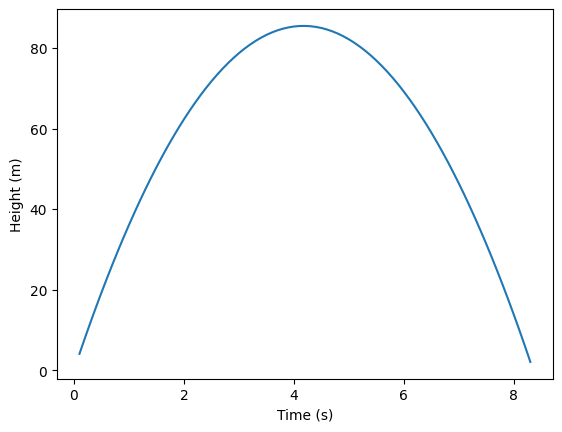

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Nodefinēju konstantus mainīgos, kas ir doti priekš variantiem, jo nezināju kuru variantu pildīt
V_ZERO = 50
ANGLE_THETA = math.radians(55)
GRAVITY = 9.81
HEIGHT = 50

# Izveidoju funkciju h(t), kas veidota pēc augšā dotās formulas
def h(t):
    return V_ZERO * math.sin(ANGLE_THETA) * t - 0.5 * GRAVITY * t ** 2

# Izveidoju numpy array ar vērtībām 0 līdz 10 ar soli 0.1
x_points = np.arange(0.0, 10.0, 0.1)

# Aprēķinu visas augstuma vērtības, izmantojot vektorizētu funkciju
y_points = h(x_points)

# Filtrēju x un y vērtības, lai iekļautu tikai tās vērtības, kas ir virs zemes jeb y vērtības, kas ir lielākas par 0
mask = y_points > 0
x_points_valid = x_points[mask]
y_points_valid = y_points[mask]

# Izveidoju plot ar punktiem
plt.plot(x_points_valid, y_points_valid)
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.show()


1.2. Noskaidrot kopējo laiku $T$, ko lode pavada gaisā.

In [35]:
# Definēju bisekcijas funkciju, kurai padod funckiju, ko jāizmanto, intervāla sākuma punktu a, intervāla beigu punktu b un 
# es, kas nosaka, kad apstāties, šajā gadījuma apstāsies, kad atšķirība starp a un b būs mazāka par 0.00001
def bisection(f, a, b, es = 0.00001):
    i = 0
    while abs(b - a) > es:
        # Šeit atrodam vidus punktu c
        c = (a + b) / 2
        # Funckijas vērtība vidus punktā
        fc = f(c)

        # Ja f(a) * f(c) ir mazāks par 0, tas nozīmē, ka funkcijas sakne ir intervālā a,c, tāpēc b vērtību iestatām kā c
        if f(a) * fc < 0:
            b = c
        # Ja nē, tad ir jameklē intervālā c, b, tāpēc a iestatām kā c
        # teorētiski vēl var būt gadījums, kad funckijas vērtība sakrīt ar 0
        else:
            a = c
        print("i=",i,"a=",a,"b=",b,"c=",c,"f(c)=", fc)
        i = i + 1
    return a

# Izsaucu bisekcijas funkciju, kur padodu, iepriekš definēto h(t), kur a = 0 un b = 10, jo sākuma t ir 0 un no grafika redzams, ka laiks
# ir starp 8 un 9, kad tā sasniedz zemi, tāpēc kā b izvēlējos 10
a = bisection(h, 0, 10)
print(f"Kopējais gaisā pavadītais laiks: {a:.2f}s")

i= 0 a= 5.0 b= 10 c= 5.0 f(c)= 82.16301107224794
i= 1 a= 7.5 b= 10 c= 7.5 f(c)= 31.275766608371896
i= 2 a= 7.5 b= 8.75 c= 8.75 f(c)= -17.16004312356614
i= 3 a= 8.125 b= 8.75 c= 8.125 f(c)= 8.973877367402906
i= 4 a= 8.125 b= 8.4375 c= 8.4375 f(c)= -3.6140789718315887
i= 5 a= 8.28125 b= 8.4375 c= 8.28125 f(c)= 2.7996501743481303
i= 6 a= 8.28125 b= 8.359375 c= 8.359375 f(c)= -0.3772766546011326
i= 7 a= 8.3203125 b= 8.359375 c= 8.3203125 f(c)= 1.2186711959086551
i= 8 a= 8.33984375 b= 8.359375 c= 8.33984375 f(c)= 0.42256837966255034
i= 9 a= 8.349609375 b= 8.359375 c= 8.349609375 f(c)= 0.02311363978293457
i= 10 a= 8.349609375 b= 8.3544921875 c= 8.3544921875 f(c)= -0.17696456309602127
i= 11 a= 8.349609375 b= 8.35205078125 c= 8.35205078125 f(c)= -0.07689622557830944
i= 12 a= 8.349609375 b= 8.350830078125 c= 8.350830078125 f(c)= -0.026883983878121853
i= 13 a= 8.349609375 b= 8.3502197265625 c= 8.3502197265625 f(c)= -0.0018833447927022462
i= 14 a= 8.34991455078125 b= 8.3502197265625 c= 8.34991455

1.3. Atrast laika mirkli $t$, pie kura lode attrodas $H$ metrus virs zemes.

$$ h(t) = v_0 sin(θ)t - \frac{1}{2}gt^2 $$
Lai atrastu laika mirkli t, pie kura lode atrodas H metrus virs zemes, tad mums ir jāparveido iepriekšējais vienādojums, h(t) vietā ieliekot mūsu vērtību H.

Tad nonākam pie šada vienādojuma:
$$ H = v_0 sin(θ)t - \frac{1}{2}gt^2 $$

In [36]:
# Šeit izveidoju funkciju time_h, kā to ieguvu aprakstīju augstāk, šeit H esmu pārnesis labajā pusē, funckijas vērtība būs 0, ja padosim
# tai vērtību, kurā laikā lode sasniedz noteikto augstumu, tāpēc to varam izmantot ar iepriekš definēto bisekcijas funkciju, lai atrastu
# funkcijas saknes
def time_h(t):
    return V_ZERO * math.sin(ANGLE_THETA) * t - 1 / 2 * GRAVITY * t ** 2 - HEIGHT
    
# Šeit izsaucu bisekcijas funkciju izmantojot iepriekš izveidotot time_h funkciju, izsaucu to 2 reizes, kur pirmajā a vērtība ir 0
# bet otrajā 5, jo lode sasniedz šo augstumu H divas reizes, paceļoties un krītot.
a = bisection(time_h, 0, 10)
b = bisection(time_h, 5, 10)
print(f"Lode sasneidz {HEIGHT}m šādos laikos: {a:.2f}s, {b:.2f}s")

i= 0 a= 0 b= 5.0 c= 5.0 f(c)= 32.16301107224794
i= 1 a= 0 b= 2.5 c= 2.5 f(c)= 21.73775553612397
i= 2 a= 1.25 b= 2.5 c= 1.25 f(c)= -6.467059731938015
i= 3 a= 1.25 b= 1.875 c= 1.875 f(c)= 9.551363527092974
i= 4 a= 1.25 b= 1.5625 c= 1.5625 f(c)= 2.021155803827476
i= 5 a= 1.40625 b= 1.5625 c= 1.40625 f(c)= -2.1032009874927695
i= 6 a= 1.484375 b= 1.5625 c= 1.484375 f(c)= -0.01108484769201823
i= 7 a= 1.484375 b= 1.5234375 c= 1.5234375 f(c)= 1.0125199141028887
i= 8 a= 1.484375 b= 1.50390625 c= 1.50390625 f(c)= 0.5025886422142207
i= 9 a= 1.484375 b= 1.494140625 c= 1.494140625 f(c)= 0.24621967451329851
i= 10 a= 1.484375 b= 1.4892578125 c= 1.4892578125 f(c)= 0.11768435772368946
i= 11 a= 1.484375 b= 1.48681640625 c= 1.48681640625 f(c)= 0.053328991094097944
i= 12 a= 1.484375 b= 1.485595703125 c= 1.485595703125 f(c)= 0.021129380720601887
i= 13 a= 1.484375 b= 1.4849853515625 c= 1.4849853515625 f(c)= 0.005024093769186777
i= 14 a= 1.48468017578125 b= 1.4849853515625 c= 1.48468017578125 f(c)= -0.003029

1.4. Atrast maksimālo sasniegto augstumu $H_{max}$

In [38]:
# Funkcija, kas atrod, vertikālo paatrinājumu pēc laika t
# https://pressbooks.bccampus.ca/universityphysicssandbox/chapter/projectile-motion/
def v(t):
    return V_ZERO * math.sin(ANGLE_THETA) - GRAVITY * t

# Šeit izmantoju bisekcijas funkciju ar iepriekš definētu funkciju v(t), kas atrod vertikālo pāātrinājumu pēc laika t, teorētiski, kad
# v(t) vērtība ir 0, tad mēs atrodamies augstākajā punktā, tātad a vērtība no bisekcijas funkcijas būs laiks, kad lode atrodas augstākajā punktā,
# šeit a un b padodu kā 0 un 6, jo pēc grafika var redzēt, ka lode jau ir garām augstākajam punktam pie laika t = 6
a = bisection(v, 0, 6)
print(f"Laiks, kad lode sasniedz augstāko punktu: {a:0.2f}s")
print(f"Augstākais punkts kādu lode sasniedz: {h(a):0.2f}m")

i= 0 a= 3.0 b= 6 c= 3.0 f(c)= 11.527602214449587
i= 1 a= 3.0 b= 4.5 c= 4.5 f(c)= -3.1873977855504165
i= 2 a= 3.75 b= 4.5 c= 3.75 f(c)= 4.170102214449585
i= 3 a= 4.125 b= 4.5 c= 4.125 f(c)= 0.4913522144495843
i= 4 a= 4.125 b= 4.3125 c= 4.3125 f(c)= -1.3480227855504126
i= 5 a= 4.125 b= 4.21875 c= 4.21875 f(c)= -0.42833528555041767
i= 6 a= 4.171875 b= 4.21875 c= 4.171875 f(c)= 0.03150846444958688
i= 7 a= 4.171875 b= 4.1953125 c= 4.1953125 f(c)= -0.1984134105504154
i= 8 a= 4.171875 b= 4.18359375 c= 4.18359375 f(c)= -0.08345247305041426
i= 9 a= 4.171875 b= 4.177734375 c= 4.177734375 f(c)= -0.025972004300413687
i= 10 a= 4.1748046875 b= 4.177734375 c= 4.1748046875 f(c)= 0.0027682300745865973
i= 11 a= 4.1748046875 b= 4.17626953125 c= 4.17626953125 f(c)= -0.011601887112917098
i= 12 a= 4.1748046875 b= 4.175537109375 c= 4.175537109375 f(c)= -0.004416828519168803
i= 13 a= 4.1748046875 b= 4.1751708984375 c= 4.1751708984375 f(c)= -0.00082429922228755
i= 14 a= 4.17498779296875 b= 4.1751708984375 c= 4